<a href="https://colab.research.google.com/github/diego1401/CSE303/blob/main/CSE303_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **WEEK 1**

---



## **Part 1**

In [5]:
import torch

In [6]:
x = torch.rand((2,5))

#why does he say there is no reshape?
print(x.view((1,10)))
print(x.reshape(1,10))

tensor([[0.2622, 0.9849, 0.6699, 0.6634, 0.9104, 0.0710, 0.6548, 0.3125, 0.4177,
         0.2631]])
tensor([[0.2622, 0.9849, 0.6699, 0.6634, 0.9104, 0.0710, 0.6548, 0.3125, 0.4177,
         0.2631]])


## **Part 2**





In [7]:

import torchvision
from torchvision import transforms, datasets

In [8]:
train = datasets.MNIST("",train=True,download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("",train=False,download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [9]:
a = [1,2,3,4]
b = torch.utils.data.DataLoader(a)
#we see that torch.utils.data.Dataloader puts the elements of a list into tensors
for i in b:
  print(i)

tensor([1])
tensor([2])
tensor([3])
tensor([4])


In [10]:
# We are careful to set shuffle to True, avoid ordered data
trainset = torch.utils.data.DataLoader(train, batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10,shuffle=True)

In [11]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [12]:
x,y = data[0][0],data[1][0]

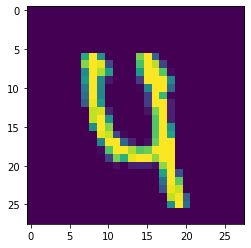

In [13]:
import matplotlib.pyplot as plt
plt.imshow(x.reshape(28,28))
plt.show()

In [14]:
print(y)

tensor(4)


In [15]:
#We always want to check for the BALANCE of the dataset
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for data in trainset:
  Xs, ys = data
  for y in ys:
    counter_dict[(int(y))] +=1
    total +=1
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [16]:
for i in counter_dict:
  print(f"{i}:{counter_dict[i]/total*100}")

0:9.871666666666666
1:11.236666666666666
2:9.93
3:10.218333333333334
4:9.736666666666666
5:9.035
6:9.863333333333333
7:10.441666666666666
8:9.751666666666667
9:9.915000000000001


## **Part 3**

In [17]:
import torch.nn as nn
import torch.nn.functional as F


In [18]:
#torch.relu for nn.sequetial it creates a nn.Module

In [19]:
class Net(nn.Module):
  def __init__(self):
    super().__init__() #super inherit methods and attributes of nn.Module

    #layers
    self.fc1 = nn.Linear(28*28, 64) #28*28 bc flatten, 64 is arbitrary
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10) #10 as output as there are 10 classes


  def forward(self, x):
    #We can apply logic to this (if,else,...)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)



    return F.log_softmax(x,dim=1) 

#to get a probabilistic result, dim=1 bc
#we want the classes to sum to 1, not the batches
net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [20]:
X = torch.rand((28,28)).reshape(1,784) # -1 to specify an unknown size
output = net(X)

In [21]:
output

tensor([[-2.2689, -2.1912, -2.3230, -2.3123, -2.2218, -2.3064, -2.4542, -2.3665,
         -2.2340, -2.3761]], grad_fn=<LogSoftmaxBackward>)

In [22]:
print(list(net.parameters()))

[Parameter containing:
tensor([[-0.0009, -0.0250,  0.0062,  ...,  0.0149, -0.0222, -0.0307],
        [ 0.0180, -0.0155, -0.0007,  ..., -0.0212, -0.0203, -0.0095],
        [ 0.0200, -0.0136,  0.0047,  ..., -0.0019,  0.0258, -0.0069],
        ...,
        [ 0.0187,  0.0261,  0.0180,  ...,  0.0336, -0.0039, -0.0007],
        [ 0.0182, -0.0280, -0.0354,  ..., -0.0334, -0.0012,  0.0150],
        [-0.0125,  0.0126,  0.0229,  ...,  0.0052,  0.0287,  0.0010]],
       requires_grad=True), Parameter containing:
tensor([-1.6786e-03, -2.9446e-02, -2.2371e-02, -3.4770e-02,  2.7618e-03,
        -3.4420e-02, -3.3470e-02, -5.9796e-03, -1.3107e-02, -1.6199e-02,
        -2.2163e-02,  2.6699e-02,  2.5845e-02, -8.0573e-03, -1.6131e-02,
        -2.3564e-02,  7.6716e-03, -2.2822e-02, -9.6601e-03, -7.3938e-03,
         8.9998e-03,  1.9568e-02, -3.1440e-02,  2.4471e-03, -3.0764e-02,
         3.5250e-02,  9.4065e-05,  2.5642e-02, -1.3508e-02, -5.8832e-03,
        -1.0056e-02, -2.8044e-02, -1.7773e-02,  2.2795e

In [23]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
  for data in trainset:
    #data here is a bacth
    X,y = data
    net.zero_grad()
    output = net(X.reshape(-1,784))
    loss = F.nll_loss(output,y) #we use nll_loss bc we dont have a one hot vect
    #repr for the targets, for one hot vect use MSE
    #we could do it by hand, i.e SGD
    loss.backward()
    optimizer.step()
  print(loss)

#We mainly use pytorch for reasearch
#Tensorflow for google, apps, also google reasearch
# Caffe and Caffe 2 also exist


tensor(0.0694, grad_fn=<NllLossBackward>)
tensor(0.1051, grad_fn=<NllLossBackward>)
tensor(0.0011, grad_fn=<NllLossBackward>)


In [24]:
import torch

Accuracy:  0.97735


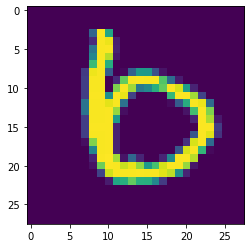

In [25]:
correct = 0
total = 0

with torch.no_grad(): #we dont wanna calculate gradients
  for data in trainset:
    X,y = data
    output = net(X.reshape(-1,784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      else:
        plt.imshow(X[idx].reshape(28,28))
        #I dont even know what that is XD
      total +=1

print("Accuracy: ",correct/total)


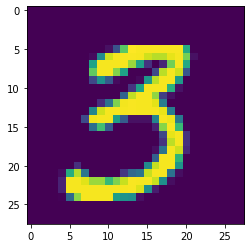

In [26]:
plt.imshow(X[9].reshape(28,28))
plt.show()

In [27]:
print(torch.argmax(net(X[9].reshape(-1,784))))

tensor(3)


## Part 5

Convolutional neural networks

In [28]:
#we use this to be able to access the data in the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import os
path = '/content/drive/My Drive/Colab Notebooks'
#os.chdir(path)

cwd = os.getcwd()
print(cwd)

print(os.listdir())


/content/drive/My Drive/Colab Notebooks
['catvdog.zip', 'folder', 'training_data.npy', 'MNIST', 'CSE303_week1.ipynb']


In [ ]:
#we used this to unzip the dataset into folder
#!unzip -uq "catvdog.zip" -d "folder"

In [32]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False

class DogsVsCats():
  IMG_SIZE = 50
  
  CATS = "folder/PetImages/Cat"
  DOGS = "folder/PetImages/Dog"
  LABELS = {CATS:0, DOGS:1}
  training_data = []
  catcount = 0
  dogcount = 0
  #BALANCE

  def make_training_data(self):
    for label in self.LABELS:
      print(label)
      for f in tqdm(os.listdir(label)):
        try:
          path = os.path.join(label,f)
          img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
          #simplify
          img = cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))
          self.training_data.append([np.array(img),np.eye(2)[self.LABELS[label]]])

          if label == self.CATS:
            self.catcount += 1
          elif label == self.DOGS:
            self.dogcount += 1
        except Exception as e:
          print(str(e))
          pass
      
      np.random.shuffle(self.training_data)
      np.save("training_data.npy",self.training_data)
      print("Cats:",self.catcount)
      print("Dogs:",self.dogcount)

if REBUILD_DATA:
  dogsvcats = DogsVsCats()
  dogsvcats.make_training_data()

In [ ]:
#this is a cool trick to transform numbers into a 1 hot representation
#np.eye(# of classes)[index of target]

In [33]:
training_data = np.load("training_data.npy",allow_pickle=True)

In [34]:
print(len(training_data))

24946


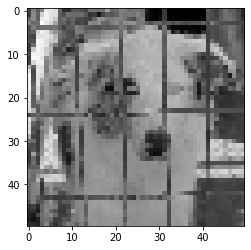

In [35]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1][0],cmap='gray')
plt.show()

In [36]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,32,5)
    self.conv2 = nn.Conv2d(32,64,5)
    self.conv3 = nn.Conv2d(64,128,5)

    x = torch.randn(50,50).reshape(-1,1,50,50)
    #UNDERSTAND SIZE OF LINEAR INPUT
    
    self._to_linear = None
    self.convs(x)
    self.fc1 = nn.Linear(self._to_linear,512)
    self.fc2 = nn.Linear(512,2)
  def convs(self,x):
    x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)),(2,2))
    x = F.max_pool2d(F.relu(self.conv3(x)),(2,2))
    if self._to_linear is None:
      self._to_linear = x[0].shape[0] * x[0].shape[1] * x[0].shape[2]
    return x

  def forward(self,x):
    x = self.convs(x)
    x = x.reshape(-1,self._to_linear)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.softmax(x, dim=1)

net = Net()

In [37]:
optmizer = optim.Adam(net.parameters(),lr=0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).reshape(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1
val_size = int(len(X) * VAL_PCT)
print(val_size)

2494


In [39]:
#Important to have a validation set
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(len(train_X))
print(len(test_X))

22452
2494


In [40]:
BATCH_SIZE = 100

EPOCHS = 1
for epoch in range(EPOCHS):
  for i in tqdm(range(0,len(train_X),BATCH_SIZE)):
    batch_X = train_X[i:i+BATCH_SIZE].reshape(-1,1,50,50)
    batch_y = train_y[i:i+BATCH_SIZE]

    net.zero_grad()
    #as long as the mode.parameters() are controled by the optim, equivalent to 
    #optim.zero_grad()
    outputs = net(batch_X)
    loss = loss_function(outputs, batch_y)
    loss.backward()
    optimizer.step()

100%|██████████| 225/225 [01:49<00:00,  2.06it/s]


In [41]:
correct = 0
total = 0
with torch.no_grad():
  for i in tqdm(range(len(test_X))):
    real_class = torch.argmax(test_y[i])
    net_out = net(test_X[i].reshape(-1,1,50,50))[0]
    predicted_class = torch.argmax(net_out)
    if predicted_class == real_class:
      correct += 1
    total += 1
print("Accuracy:",correct/total)

100%|██████████| 2494/2494 [00:07<00:00, 347.62it/s]

Accuracy: 0.49518845228548514
